In [1]:
#OM NAMO NARAYANA

https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

In [2]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import pandas as pd
import random
import numpy as np
import math
from tqdm import tqdm

## Dataset preparation

In [4]:
dataset_dir = 'H:/sem8/nlp/proof-of-concept/Motivational Quotes Database.csv'


df = pd.read_csv(dataset_dir)
df.head()

,Quotes,Author,Category
0,Age is an issue of mind over matter. If you do...,Mark Twain,age\n
1,"Anyone who stops learning is old, whether at t...",Henry Ford,age\n
2,Wrinkles should merely indicate where smiles h...,Mark Twain,age\n
3,True terror is to wake up one morning and disc...,Kurt Vonnegut,age\n
4,A diplomat is a man who always remembers a wom...,Robert Frost,age\n


In [5]:
sentences = df['Quotes'].to_list()
sentences[:2]

["Age is an issue of mind over matter. If you don't mind, it doesn't matter.",
 'Anyone who stops learning is old, whether at twenty or eighty. Anyone who keeps learning stays young. The greatest thing in life is to keep your mind young.']

In [6]:
tokenized_sent = []
for s in tqdm(sentences):
    tokenized_sent.append(word_tokenize(s.lower()))
print(*tokenized_sent[1:3])

100%|██████████████████████████████████████████████████████████████████████████| 45575/45575 [00:09<00:00, 4638.61it/s]

['anyone', 'who', 'stops', 'learning', 'is', 'old', ',', 'whether', 'at', 'twenty', 'or', 'eighty', '.', 'anyone', 'who', 'keeps', 'learning', 'stays', 'young', '.', 'the', 'greatest', 'thing', 'in', 'life', 'is', 'to', 'keep', 'your', 'mind', 'young', '.'] ['wrinkles', 'should', 'merely', 'indicate', 'where', 'smiles', 'have', 'been', '.']


In [7]:
# def cosine(u, v):
#     return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
# #use inbuilt scipy.spatial.distance.cosine 

In [8]:
from scipy.spatial import distance

## Doc2Vec

In [9]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data[:2]

D:\OS\programs\anaconda3\envs\fyp\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[TaggedDocument(words=['age', 'is', 'an', 'issue', 'of', 'mind', 'over', 'matter', '.', 'if', 'you', 'do', "n't", 'mind', ',', 'it', 'does', "n't", 'matter', '.'], tags=[0]),
 TaggedDocument(words=['anyone', 'who', 'stops', 'learning', 'is', 'old', ',', 'whether', 'at', 'twenty', 'or', 'eighty', '.', 'anyone', 'who', 'keeps', 'learning', 'stays', 'young', '.', 'the', 'greatest', 'thing', 'in', 'life', 'is', 'to', 'keep', 'your', 'mind', 'young', '.'], tags=[1])]

In [10]:
## Train doc2vec model
%time model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 10)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
words = list(model.wv.index_to_key)


Wall time: 28.8 s


In [11]:
# words = list(model.wv.index_to_key)
# print(words[:100], len(words))

In [12]:
test_doc = word_tokenize("freedom".lower())
test_doc_vector = model.infer_vector(test_doc)
print(test_doc_vector)
x = model.dv.most_similar(positive = [test_doc_vector], topn=10)
print(x)

[ 0.13681448 -0.072593   -0.02098905  0.06470512 -0.11371465 -0.1001238
  0.09094466  0.01187494  0.05876266 -0.01651727 -0.03715911 -0.01518352
 -0.03383817 -0.16784012  0.1116206  -0.03801637  0.07788008 -0.04885274
  0.03514225 -0.10994279]
[(32137, 0.9394439458847046), (16062, 0.9158200025558472), (36792, 0.9133024215698242), (32161, 0.9042444825172424), (16286, 0.9038118720054626), (26916, 0.8988608717918396), (2132, 0.8961572647094727), (15120, 0.8954105973243713), (9705, 0.8953298330307007), (4271, 0.8918415307998657)]


In [13]:
index = [sentences[j] for j in [i[0] for i in x]]
for y in index:
    print(y)

Faith is spiritualized imagination.
Our religion does not discriminate according to color, sex or anything else. What counts is piety and faith.
Love's greatest gift is its ability to make everything it touches sacred.
Imagination decides everything.
Put your faith in God and confidence in yourself.
Happiness depends upon ourselves.
Anger elicits anger, fear elicits fear, no matter how well meaning we may be.
Success is usually the culmination of controlling failure.
Courage is fire, and bullying is smoke.
Nothing surpasses the beauty and elegance of a bad idea.


## SentenceBERT

In [14]:
from sentence_transformers import SentenceTransformer
%time sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Wall time: 20.7 s


In [15]:
%time sentence_embeddings = sbert_model.encode(sentences[:2000])

#print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
#print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

Wall time: 1min 46s


In [16]:
query = "God is Great"
query_vec = sbert_model.encode([query])[0]

In [17]:
topn = 5
n = 2000

sim = []
for sent in tqdm(random.sample(sentences, n)):
  sim.append(distance.cosine(query_vec, sbert_model.encode([sent])[0]))
#   print("Sentence = ", sent, "; similarity = ", sim)
ind = np.argpartition(sim, -topn)[-topn:]
print(np.array(sentences)[ind])

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:16<00:00, 14.64it/s]


["We've put more effort into helping folks reach old age than into helping them enjoy it."
 "One person alone can't do anything as important as bringing genuine democracy to a country."
 'Sure I played, did you think I was born at the age of 70 sitting in a dugout trying to manage guys like you?'
 'At this age, I should be leading a quiet life.'
 'When the shriveled skin of the ordinary is stuffed out with meaning, it satisfies the senses amazingly.']


In [18]:
# from huggingface_hub import create_repo

## InferSent

In [19]:
import os

encoder_dir = 'H:/sem8/nlp/proof-of-concept/'

os.chdir(encoder_dir)

if(os.path.isdir(encoder_dir + 'encoder')  == False):
    ! mkdir encoder
    ! curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl
else:
    print('A subdirectory already exists.')
    

if(os.path.isdir(encoder_dir + 'Glove')  == False):
    ! mkdir GloVe
    ! curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
    ! unzip GloVe/glove.840B.300d.zip -d GloVe/
else:
    print('A subdirectory already exists.')


A subdirectory already exists.
A subdirectory already exists.


In [20]:
from models import InferSent
import torch

V = 2
base_path = 'H:/sem8/nlp/proof-of-concept/'
MODEL_PATH = base_path + 'encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = base_path + '/GloVe/glove.840B.300d.txt'
model.set_w2v_path(W2V_PATH)

In [25]:
%time model.build_vocab(sentences, tokenize=True)

100%|███████████████████████████████████████████████████████████████████████| 45575/45575 [00:00<00:00, 3046738.25it/s]


Found 42186(/44882) words with w2v vectors
Vocab size : 42186
Wall time: 29.9 s


In [26]:
query = "Life is very short, nanba, always be happy. Design Design a problems will come and go don't worry"
query_vec = model.encode(query)[0]
query_vec

H:\jupyter-files\models.py:207: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sentences = np.array(sentences)[idx_sort]


array([-0.01715463,  0.04943122, -0.17540526, ..., -0.01258784,
       -0.067958  , -0.04156346], dtype=float32)

In [29]:
topn = 10
n = 100

similarity = []
sim = []

for sent in tqdm(random.sample(sentences, n)):
  sim.append(distance.cosine(query_vec, model.encode([sent])[0]))
ind = np.argpartition(sim, -topn)[-topn:]
print(np.array(sentences)[ind])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.30it/s]


['Old age is no place for sissies.'
 'Middle age is the awkward period when Father Time starts catching up with Mother Nature.'
 'I want to get old gracefully. I want to have good posture, I want to be healthy and be an example to my children.'
 'Like everyone else who makes the mistake of getting older, I begin each day with coffee and obituaries.'
 "He has a profound respect for old age. Especially when it's bottled."
 'Alas, after a certain age every man is responsible for his face.'
 "Old age is like everything else. To make a success of it, you've got to start young."
 'After thirty, a body has a mind of its own.'
 "There's no such thing as old age, there is only sorrow."
 'Old age comes on suddenly, and not gradually as is thought.']


In [30]:
import matplotlib.pyplot as plt

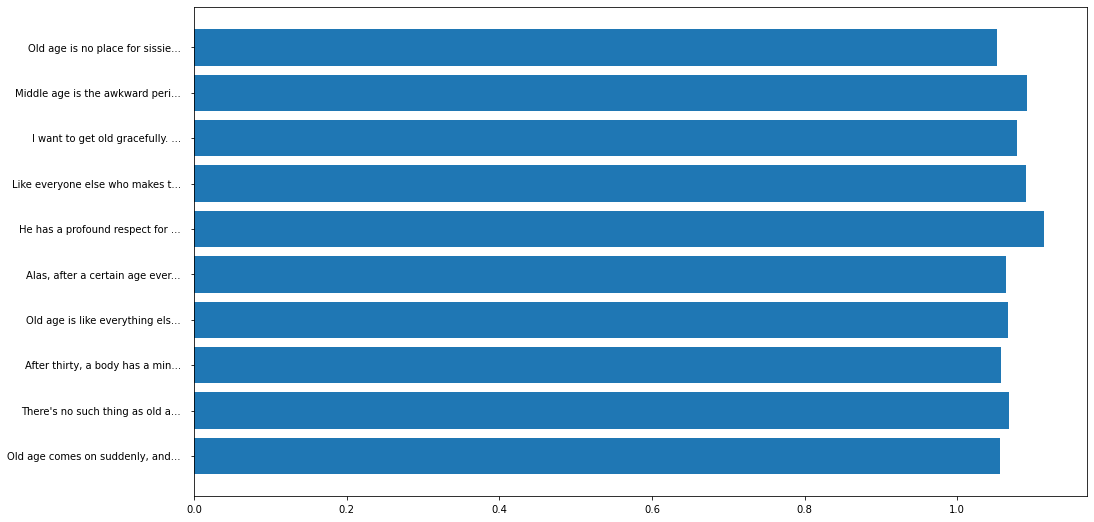

In [31]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.barh([x[:30] + '...' for x in np.array(sentences)[ind]], np.array(sim)[ind])
ax.invert_yaxis()
plt.show()